# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [39]:
# Dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import scipy.stats as st
import numpy as np

# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_results = pd.DataFrame()
mouse_results = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

# Display the data table for preview

mouse_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [40]:
# Check the number of mice

unique_mice = mouse_results["Mouse ID"].nunique()
print(f"There are {unique_mice} unique mice IDs.")

There are 249 unique mice IDs.


In [41]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint

duplicate_mice = mouse_results[mouse_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [42]:
# Get all the data for the duplicate mouse ID

duplicate_mouse = mouse_results[mouse_results["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_results = mouse_results[mouse_results["Mouse ID"] != "g989"]
clean_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [44]:
# Check the number of mice in the clean DataFrame

unique_mice = clean_results["Mouse ID"].nunique()
print(f"There are {unique_mice} unique mice IDs.")

There are 248 unique mice IDs.


## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group data by drug regimen

drug_regimen = clean_results.groupby(["Drug Regimen"])

# Calculate summary statistics: mean, median, variance, standard deviation of tumor volume

mean_bydrug = drug_regimen["Tumor Volume (mm3)"].mean()
median_bydrug = drug_regimen["Tumor Volume (mm3)"].median()
variance_bydrug = drug_regimen["Tumor Volume (mm3)"].var()
std_bydrug = drug_regimen["Tumor Volume (mm3)"].std()

# Calculate SEM of tumor volume

sample_size = drug_regimen["Tumor Volume (mm3)"].count()
sem_bydrug = std_bydrug / np.sqrt(sample_size)

# Assemble above series into single summary DataFrame

summary = pd.DataFrame({
    "Mean": mean_bydrug,
    "Median": median_bydrug,
    "Variance": variance_bydrug,
    "Standard Deviation": std_bydrug,
    "SEM": sem_bydrug
})

summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [55]:
# Using the aggregation method, produce the same summary statistics in a single line

# Define and apply aggregate functions for mean, median, variance, and standard deviation

agg_functions = {
    "Tumor Volume (mm3)": ["mean", "median", "var", "std"]
}
agg_data = drug_regimen.agg(agg_functions)

# Calculate SEM separately and add to DataFrame

sample_size = drug_regimen["Tumor Volume (mm3)"].count()
sem_bydrug = std_bydrug / np.sqrt(sample_size)
agg_data["Tumor Volume (mm3)", "SEM"] = sem_bydrug

# Flatten MultiIndex columns

agg_data.columns= ["_".join(col).strip() for col in agg_data.columns.values]

# Rename columns

agg_data.rename(columns={
    "Tumor Volume (mm3)_mean": "Mean",
    "Tumor Volume (mm3)_median": "Median",
    "Tumor Volume (mm3)_var": "Variance",
    "Tumor Volume (mm3)_std": "Standard Deviation",
    "Tumor Volume (mm3)_SEM": "SEM"
}, inplace=True)

agg_data

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [66]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.



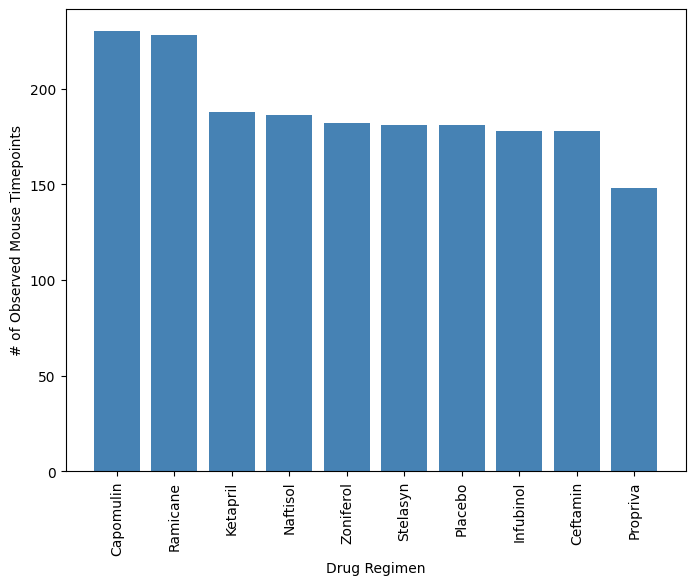

In [117]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Set x and y axes

number_rows = clean_results["Drug Regimen"].value_counts()
x_axis = np.arange(len(number_rows))

# Plot bar graph

plt.figure(figsize=(8, 6))
plt.bar(x_axis, number_rows, color="steelblue", align="center")

# Create ticks

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", 
                            "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"], rotation=90)

# Set labels

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



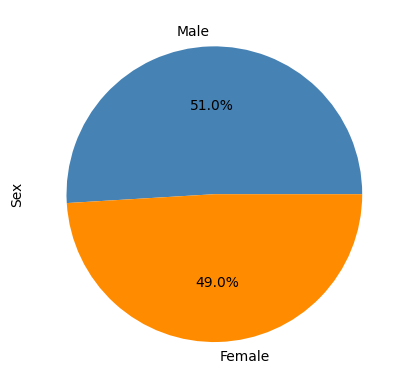

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Calculate number of male and female mice

male_count = len(clean_results[clean_results["Sex"] == "Male"])
female_count = len(clean_results[clean_results["Sex"] == "Female"])

# Create pie chart

labels = ["Male", "Female"]
sizes = [male_count, female_count]
colors = ["steelblue", "darkorange"]
explode = (0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=0)
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [114]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Get the last (greatest) timepoint for each mouse

mouse = clean_results.groupby(["Mouse ID"])
greatest_timepoint = mouse["Timepoint"].max()

# Create grouped DataFrame

df_bytimepoint = pd.DataFrame({
    "Timepoint": greatest_timepoint
})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_results = pd.merge(clean_results, df_bytimepoint, on=["Mouse ID", "Timepoint"], how="right")

top_final_results = final_results[
    (final_results["Drug Regimen"] == "Capomulin") | 
    (final_results["Drug Regimen"] == "Ramicane") |
    (final_results["Drug Regimen"] == "Infubinol") | 
    (final_results["Drug Regimen"] == "Ceftamin")
]
top_final_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
3,a275,Ceftamin,Female,20,28,45,62.999356,3
6,a411,Ramicane,Male,3,22,45,38.407618,1
7,a444,Ramicane,Female,10,25,45,43.047543,0


In [124]:
# Put treatments into a list for for loop (and later for plot labels)

treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

outlier = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
                     
for drug in treatment:

    # Locate the rows which contain mice on each drug and get the tumor volumes

    drug_final_results = top_final_results[top_final_results["Drug Regimen"] == drug]
    tumor_vol = drug_final_results["Tumor Volume (mm3)"]

    # Calculate 1st and 3rd quartiles, IRQ, and upper and lower bounds

    q1 = tumor_vol.quantile(0.25)
    q3 = tumor_vol.quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    
    # Determine outliers using upper and lower bounds

    outliers = tumor_vol[(tumor_vol < lower) | (tumor_vol > upper)]

    if not outliers.empty:
        print(f"{drug}'s potential outliers: {outliers}.")
    else:
        print(f"{drug}'s potential outliers: None.")

Capomulin's potential outliers: None.
Ramicane's potential outliers: None.
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Ceftamin's potential outliers: None.


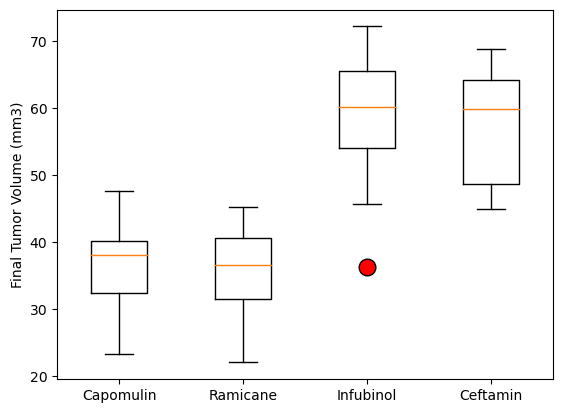

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

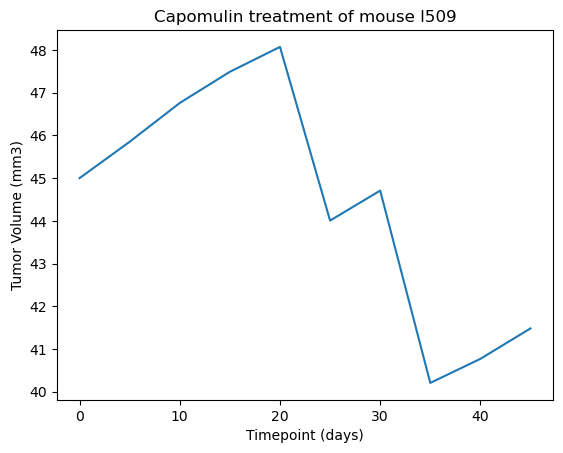

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


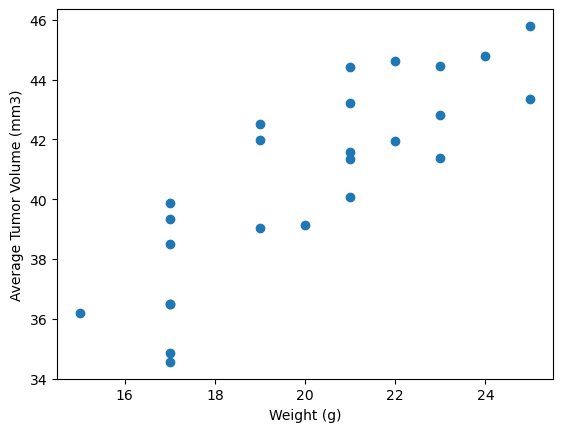

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


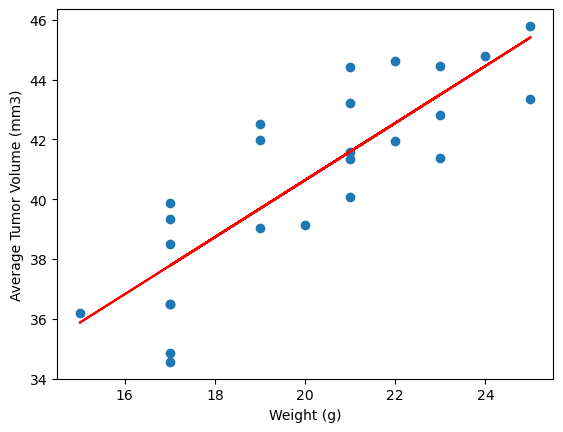

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
